# Sensor placement for quality monitoring

## Initialize EPANET Python Toolkit (EPyT)
You should always begin with this command to import the toolkit

In [33]:
from epyt import epanet

## Introduction
Introduction
Large-scale networks are difficult to monitor, and it is not possible to have sensors everywhere in the system, mainly due to costs. For this reason, we need to select the best locations to install sensors, in order to guarantee certain criteria, such as:  
   - Network coverage  
   - Detection delay  
   - Impact (e.g., number of people affected)   
     
                                                      
Sensor placement requires the following steps:
   1. Create simulation scenarios of contamination events
   2. Execute the simulation scenarios
   3. Measure the impact
   4. Formulate and solve an optimization problem
   5. If multiple objectives, costruct the Pareto front and select one solution

### Setup simulations for computing covereage matrix

In [34]:
import numpy as np

np.random.seed(1)

## Load EPANET Network and MSX

In [35]:
G = epanet('BWSN_Network_1.inp')    # Load EPANET Input file

EPANET version 20200 loaded (EPyT version 1.1.6).
Input File BWSN_Network_1.inp loaded successfully.



### Simulation Setup

In [36]:
t_d = 5 # days
print('t_d =', t_d)

t_d = 5


In [37]:
G.setTimeSimulationDuration(t_d*24*60*60)

## Get Network data

In [38]:
demand_pattern = G.getPattern()
roughness_coeff = G.getLinkRoughnessCoeff()
node_id = G.getNodeNameID()
Nnodes = G.getNodeCount()
# *Setup uncertainties*

## Scenarios

In [39]:
Ns = 50 # Number of scenarios to simulate
u_p = 0.2   # pattern uncertainty
print('u_p =', u_p)

u_p = 0.2


In [40]:
u_r = 0.2   # roughness coefficient uncertainty
print('u_r =', u_r)

u_r = 0.2


Create the scenarios - first without contamination, to compute the bounds

In [41]:
max_inj_conc = 10.0
print('max_inj_conc =', max_inj_conc)

max_inj_conc = 10.0


In [42]:
inj_start_time = 1 
print('inj_start_time =', inj_start_time)

inj_start_time = 1


In [43]:
inj_duration = 24   # maximum duration of 12 hours
print('inj_duration =', inj_duration)

inj_duration = 24


In [44]:
# Generate injection scenarios
inj_sc = np.column_stack((
    np.random.randint(1, Nnodes + 1, size=Ns),  # Random integers between 1 and Nnodes inclusive
    max_inj_conc * np.ones(Ns),
    inj_start_time * np.ones(Ns),
    inj_duration * np.ones(Ns)
))
print('inj_sc = \n', inj_sc)

inj_sc = 
 [[ 38.  10.   1.  24.]
 [ 73.  10.   1.  24.]
 [ 80.  10.   1.  24.]
 [ 72.  10.   1.  24.]
 [ 26.  10.   1.  24.]
 [ 21.  10.   1.  24.]
 [102.  10.   1.  24.]
 [ 51.  10.   1.  24.]
 [ 69.  10.   1.  24.]
 [ 97.  10.   1.  24.]
 [ 87.  10.   1.  24.]
 [  8.  10.   1.  24.]
 [ 64.  10.   1.  24.]
 [ 62.  10.   1.  24.]
 [ 23.  10.   1.  24.]
 [ 58.  10.   1.  24.]
 [  2.  10.   1.  24.]
 [129.  10.   1.  24.]
 [ 61.  10.   1.  24.]
 [  9.  10.   1.  24.]
 [116.  10.   1.  24.]
 [122.  10.   1.  24.]
 [ 31.  10.   1.  24.]
 [ 72.  10.   1.  24.]
 [ 50.  10.   1.  24.]
 [ 58.  10.   1.  24.]
 [  4.  10.   1.  24.]
 [ 25.  10.   1.  24.]
 [ 44.  10.   1.  24.]
 [ 77.  10.   1.  24.]
 [ 27.  10.   1.  24.]
 [ 53.  10.   1.  24.]
 [ 81.  10.   1.  24.]
 [110.  10.   1.  24.]
 [116.  10.   1.  24.]
 [ 42.  10.   1.  24.]
 [ 16.  10.   1.  24.]
 [ 65.  10.   1.  24.]
 [ 26.  10.   1.  24.]
 [112.  10.   1.  24.]
 [ 27.  10.   1.  24.]
 [105.  10.   1.  24.]
 [ 23.  10.   1.  24.]


In [45]:
# *Create the coverage matrix*
# The coverage matrix is a binary matrix, where earh row is a scenario, and 
# each column is a node. If a certain contamination scenario affects (can reach) 
# a certain node, the flag is true, else false.

K = np.zeros((Ns, Nnodes))
for i in range(Ns):
    print(f'Iteration {i+1}')
    
    # Randomize demands
    r_p = -u_p + 2*u_p*np.random.rand(demand_pattern.shape[0], demand_pattern.shape[1])
    new_demand_pattern = demand_pattern + demand_pattern*r_p
    G.setPatternMatrix(new_demand_pattern) # Set new patterns
    
    # Randomize pipe roughness
    r_r = -u_r + 2*u_r*np.random.rand(len(roughness_coeff))
    new_roughness_coeff = roughness_coeff + roughness_coeff*r_r
    G.setLinkRoughnessCoeff(new_roughness_coeff) # Set new roughness coefficients
    
    c = np.zeros(Nnodes)
    c[int(inj_sc[i, 0])-1] = inj_sc[i, 1]  
    G.setNodeInitialQuality(c.tolist())
    
    qsp = G.getComputedTimeSeries().NodeQuality
    
    K[i, :] = np.max(qsp, axis=0) > 0

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50


## Optimization problem
  - Avoid having sensors to monitor the same area
  - Some scenarios affect all nodes, and some others, may not affect any node.    

This means: select those columns that have ones, so that there is at least one positive flag '1' in as many rows as possible  

  - $Y   $  is the vector of "scenario observability" (number of scenarios × 1)
  - $u $  is the solution, a binary vector (number of nodes × 1)
  - $K $  is the coverage matrix (number of scenarios × number of nodes)

                                        $$ Y = Ku $$

The optimization problem is formed (in its simplest form) as  

                                      $$ arg max f(u) $$  
                                          
                                      $$ u \epsilon \{0, 1\}^N $$
                                          
                                      $$ Σ u_i = m $$    
                                                  

Where $f(u)$  is the objective function. The simplest function is "the percentage of scenarios which can be 'detected' by the sensors".
We can have multiple functions, and in that case, we need multi-objective optimization. Solving for a single solution

In [46]:
# random selection of nodes
np.random.seed(1)
Nsensors = 5    # number of sensors
print('Nsensors =', Nsensors)

Nsensors = 5


In [47]:
from math import comb

total_combinations = comb(Nnodes, Nsensors) # 275 Millions for 5 sensors in 129 nodes
print('total_combinations =', total_combinations)

total_combinations = 275234400


In [48]:
# Create a random solution
s = np.random.permutation(Nnodes)[:Nsensors] # return random
print('s =', s)

s = [122 104  55  56  33]


In [49]:
# solution
u = np.zeros((Nnodes, 1))
u[s-1] = 1
# compute output
Y = np.dot(K, u)
print('Y =\n', Y)

Y =
 [[0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [5.]
 [0.]
 [5.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [5.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [5.]
 [0.]
 [5.]
 [0.]
 [0.]
 [5.]
 [5.]
 [0.]
 [5.]
 [5.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [5.]
 [0.]
 [5.]
 [2.]
 [5.]
 [0.]
 [5.]
 [5.]
 [5.]
 [0.]
 [0.]
 [0.]]


In [50]:
# How many non-zero elements in Y?
perc_coverage = np.sum(Y > 0) / Nsensors * 100
print('perc_coverage =', perc_coverage)

perc_coverage = 420.0


In [51]:
# *Larger scenario dataset*

  - How many scenarios should we create?
  - In general, the more scenarios, the more robust your solution
  - Simulate contamination events at different time steps
  - Simulate different hydraulic conditions   
  
#### Load results from BWSN 2006 competition (37K scenarios)

In [52]:
import scipy.io

# Load Kall.mat
data = scipy.io.loadmat('Kall.mat')
Kall = data['Kall']

# Get the size of Kall
Nsall, _ = Kall.shape
print('Nsall =', Nsall)

Nsall = 37152


#### Repeat solution computation for the larger dataset

In [53]:
Nsensors = 5    # number of sensors
print('Nsensors =', Nsensors)

Nsensors = 5


In [54]:
# Create a random solution
s = np.random.permutation(Nnodes)[:Nsensors]
print('s =', s)

s = [ 67  37   1 122  89]


In [55]:
# Solution
u = np.zeros((Nnodes, 1))
u[s - 1] = 1 
# Compute output
Y = np.dot(Kall, u)
# How many non-zero elements in Y?
perc_coverage = np.sum(Y > 0) / Nsall * 100
print('perc_coverage =', perc_coverage)

perc_coverage = 50.837101636520245


In [56]:
# *Randomized solutions for multiple sensors*
# How many sensors to install? Let's create a lot of random solutions
 
epochs = 1000
print('epochs =', epochs)

epochs = 1000


In [57]:
maxsensors = 20
print('maxsensors =', maxsensors)

maxsensors = 20


In [58]:
fx = np.zeros((epochs, 2))

for i in range(epochs):
    ns = np.random.randint(1, maxsensors + 1)  
    s = np.random.permutation(Nnodes)[:ns]  
    u = np.zeros((Nnodes, 1))
    u[s - 1] = 1  
    Y = np.dot(Kall, u)
    fx[i, :] = [ns, np.sum(Y > 0) / Nsall * 100]
    
print('fx =\n', fx.shape)

fx =
 (1000, 2)


Plotting the results

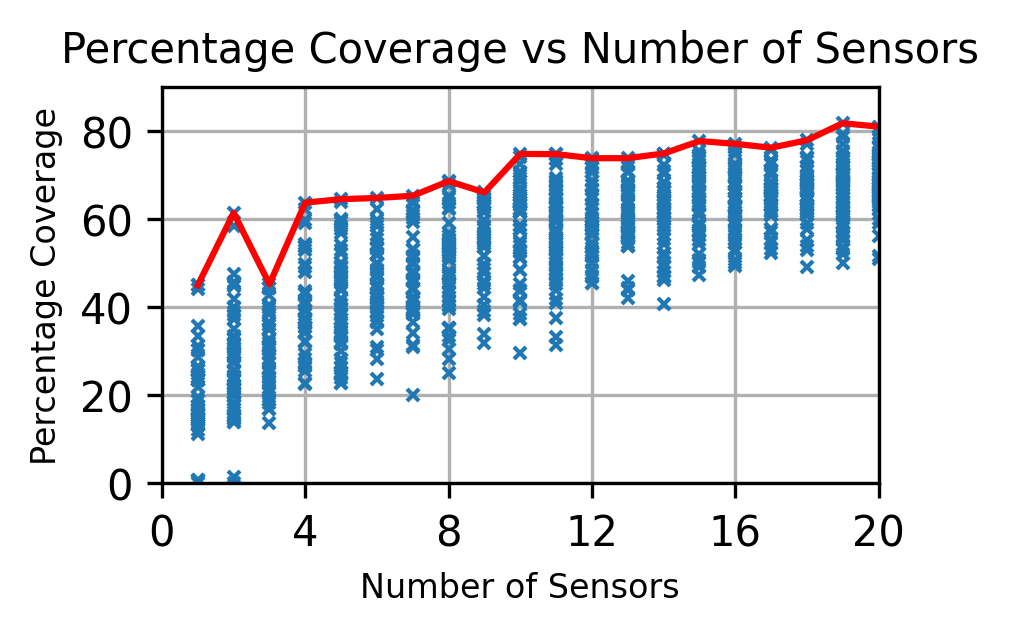

In [59]:
import matplotlib.pyplot as plt

# Plot individual points
plt.plot(fx[:, 0], fx[:, 1], 'x', markersize=3)

# Plot settings
plt.grid(True)
plt.xlabel('Number of Sensors', fontsize=8)
plt.ylabel('Percentage Coverage', fontsize=8)
plt.title('Percentage Coverage vs Number of Sensors', fontsize=10)

plt.ylim(0, 90)
plt.yticks(range(0, 90, 20))

plt.xlim(0, 20)
plt.xticks(range(0, 21, 4))

# Find maximum coverage for each number of sensors
maxfx = np.zeros((maxsensors, 2))
for i in range(1, maxsensors + 1):
    maxfx[i - 1] = [i, np.max(fx[fx[:, 0] == i, 1])]

# Plot maximum coverage
plt.plot(maxfx[:, 0], maxfx[:, 1], 'r-')

plt.show()


<b>Question:</b> Is this a valid way of solving problems
## Solving the optimization problem
  - Integer/Mixed Integer Quadradic Programming
  - Evolutionary Optimization (Single-objective)
  - Evolutionary Optimization (Multi-objective) Genetic algorithms

In [60]:
np.random.seed(2)
Nsensors = 5
print('Nsensors =', Nsensors)

Nsensors = 5


In [61]:
Nsall, Nnodes = Kall.shape
print('Nsall =', Nsall)
print('Nnodes =', Nnodes)

Nsall = 37152
Nnodes = 129


In [62]:
def gafunc(x):
    return calc_score(x, Kall, Nsall)

In [63]:
def calc_score(x, Kall, Nsall):
    # Calculate the score
    scores = np.max(Kall[:, np.round(x).astype(int)], axis=1)
    score = -np.sum(scores) / Nsall * 100
    return score


In [64]:
def calc_score_multi(x, Kall, Nsall, Tall):
    score1 = -np.sum(np.max(Kall[:, np.round(x).astype(int)], axis=1)) / Nsall * 100
    score2 = np.median(np.min(Tall[:, np.round(x).astype(int)], axis=1))
    return [score1, score2]